In [1]:
import tensorflow as tf

In [9]:
# Load the Fashion Mnist Data from Tensorflow directly
fashion_mnist  = tf.keras.datasets.fashion_mnist

In [10]:
(train_images,train_labels),(test_images,test_labels)  = fashion_mnist.load_data()

In [11]:
print("Size of training Data :",train_images.shape)
print("Size of testing Data :",test_images.shape)

Size of training Data : (60000, 28, 28)
Size of testing Data : (10000, 28, 28)


In [12]:
import numpy as np
import matplotlib.pyplot as plt

Label :  8
IMAGE PIXEL ARRAY :  [[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117   0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167 159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0 174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0   0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2   0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2   0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0   4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   5   1   0   0 157  98   0   2   

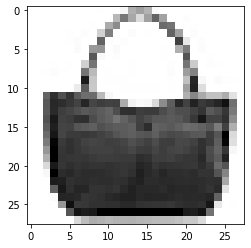

In [48]:
index = 100
np.set_printoptions(linewidth=320)

print("Label : ", train_labels[index])
print("IMAGE PIXEL ARRAY : ", train_images[index])

plt.imshow(train_images[index],cmap='Greys')

In [49]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [53]:
from cv2 import threshold

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        accuracy_threshold = 0.4
        if logs.get('loss')<accuracy_threshold:
            print("Stopping the Training Becausse loss is less then ",accuracy_threshold)
            self.model.stop_training = True

callbacks = myCallback()

In [51]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.fit(train_images,train_labels,epochs=10,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.7036 - accuracy: 0.7065
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6559 - accuracy: 0.7739
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5713 - accuracy: 0.8015
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5284 - accuracy: 0.8198
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5073 - accuracy: 0.8269
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4897 - accuracy: 0.8328
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4747 - accuracy: 0.8383
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4688 - accuracy: 0.8409
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4666 - accuracy: 0.8426
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.465

In [46]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 828us/step - loss: 0.7028 - accuracy: 0.8322


[0.7028400897979736, 0.8321999907493591]